## 학습목표
 1. numpy, pandas를 이용한 수치 및 데이터 처리
 3. matplotlib 이해 및 그래프 출력 방법 확인

* numpy 복습

In [1]:
import numpy as np

In [2]:
data = np.random.randn(2, 3)
print data

[[ 2.09545903 -1.50526482 -1.07299053]
 [-0.748619    2.23695966 -1.15885519]]


In [3]:
print data * 10

[[ 20.95459026 -15.05264824 -10.72990531]
 [ -7.48619     22.36959659 -11.58855188]]


In [4]:
print data + data

[[ 4.19091805 -3.01052965 -2.14598106]
 [-1.497238    4.47391932 -2.31771038]]


In [6]:
print data.dtype, data.shape  #원소의 type

float64 (2, 3)


In [7]:
np.zeros((2, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [8]:
np.ones((2, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [9]:
np.arange(1, 15)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [10]:
a = np.random.randn(2, 3)
print a * 2
print a / 2
print a ** 2

[[-0.76854367 -3.56543722  1.56106381]
 [-2.74468036  0.96267548 -0.97459351]]
[[-0.19213592 -0.89135931  0.39026595]
 [-0.68617009  0.24066887 -0.24364838]]
[[ 0.14766484  3.17808565  0.60923005]
 [ 1.88331757  0.23168602  0.23745813]]


* reshape

In [12]:
print np.arange(32).reshape((4, 8))
print np.arange(32).reshape((8, 4))

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


* transpose
  - 배열 전치
  - 데이터를 복사하지 않고 데이터 모양이 바뀐 뷰를 반환

In [5]:
arr = np.arange(15).reshape(5, 3)
print arr
print arr.T
print arr

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  3  6  9 12]
 [ 1  4  7 10 13]
 [ 2  5  8 11 14]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [6]:
np.dot(arr.T, arr)

array([[270, 300, 330],
       [300, 335, 370],
       [330, 370, 410]])

* universial function
  - ndarray 의 각각 원소별로 연산을 수행함
  - 벡터화 연산으로 매우 고속으로 처리됨
  - sqrt, exp 등 간단한 변형을 전체 원소에 적용

In [11]:
from math import sqrt

arr = np.arange(10000)  #numpy가 40배정도 빠름
%timeit np.sqrt(arr)
print '*' * 100

%timeit [sqrt(i) for i in arr]

10000 loops, best of 3: 44.1 µs per loop
****************************************************************************************************
100 loops, best of 3: 3.24 ms per loop


In [10]:
arr = np.arange(10)
print np.exp(arr)  #2의 0승- 1승

[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]


In [2]:
x = np.random.randn(8)
y = np.random.randn(8)

print x
print y

[ 0.3073193   0.44550625  0.59015313 -1.12582637  0.96503175 -1.17567971
 -0.34655091 -0.48868123]
[-1.48640963 -1.33156342 -0.04403284 -1.63354847  1.55176418 -0.6664156
 -0.13178492  0.80605807]


In [6]:
np.maximum(x, y)

array([ 0.3073193 ,  0.44550625,  0.59015313, -1.12582637,  1.55176418,
       -0.6664156 , -0.13178492,  0.80605807])

In [3]:
arr = np.random.randn(7) * 5
print arr
np.modf(arr) #소수

[ 3.70797679  6.59137129 -3.93837505  4.31810186  4.68772723  0.87804643
 -4.10819641]


(array([ 0.70797679,  0.59137129, -0.93837505,  0.31810186,  0.68772723,
         0.87804643, -0.10819641]), array([ 3.,  6., -3.,  4.,  4.,  0., -4.]))

* 조건
 - numpy where 함수 (x if condition else y) 삼항식의 벡터화된 버젼
 - np.where(condition, val1, val2)

In [30]:
xarr = np.array([1.0, 1.0, 1.3, 1.5, 1.5])
yarr = np.array([2.0, 3.0, 2.3, 2.7, 2.5])

cond = np.array([True, False, True, True, False])

# 순수 파이썬으로 수행되기 때문에 느리다.
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]  #true이면 x고 false이면 y값 가져옴 ->c는 boolean타입이므로
print result

[1.0, 3.0, 1.3, 1.5, 2.5]


In [31]:
# where 의 x,y 위치에는 벡터도 스칼라값도 올 수 있다.
result = np.where(cond, xarr, yarr)  #cond,true,false
print result

[ 1.   3.   1.3  1.5  2.5]


* 연습문제) 
  - 랜덤한 4*4 행렬을 생성 한 뒤, 양수는 1 음수는 -1로 바뀐 행렬을 출력하세요
  - 랜덤한 4*4 행렬을 생성 한 뒤, 양수는 1 음수는 그대로한 행렬을 출력하세요
  

In [6]:
import numpy as np
arr= np.random.randn(4,4)

print arr

[[-0.14286449 -0.38272359  0.46751209  0.03244872]
 [ 0.57954531 -0.09705229  0.35804427 -0.20735815]
 [-0.59240122  0.0844024  -0.67965322 -0.5758774 ]
 [ 0.39601982  1.25227678 -1.99189526 -0.06014075]]


In [7]:
print np.where(arr>0, 1, -1)
print np.where(arr>0, 1, arr)

[[-1 -1  1  1]
 [ 1 -1  1 -1]
 [-1  1 -1 -1]
 [ 1  1 -1 -1]]
[[-0.14286449 -0.38272359  1.          1.        ]
 [ 1.         -0.09705229  1.         -0.20735815]
 [-0.59240122  1.         -0.67965322 -0.5758774 ]
 [ 1.          1.         -1.99189526 -0.06014075]]


* 수학, 통계 함수

In [5]:
arr = np.random.randn(5, 4)
print arr

[[ 1.41629414  2.04161752 -0.95831611 -0.05946592]
 [-0.25492664  1.79151379  0.09408614 -0.3760553 ]
 [-1.75779457  1.94463897 -1.55571131 -0.23478107]
 [-0.51598072 -0.17345506 -0.68108503 -0.4906517 ]
 [-2.18904134  0.42157058  1.67363357 -0.15641811]]


In [6]:
print arr.mean() # 평균 np.ndarray의 method
print np.mean(arr) # 평균 np 패키지의 function

-0.00101640998011
-0.00101640998011


In [7]:
print np.sum(arr)
print arr.sum()

-0.0203281996021
-0.0203281996021


In [8]:
print arr
print '*****'
print arr.mean(axis = 0) # 0 - 행, 1 - 열, 따라간다.
print '*****'
print arr.mean(axis = 1)

[[ 1.41629414  2.04161752 -0.95831611 -0.05946592]
 [-0.25492664  1.79151379  0.09408614 -0.3760553 ]
 [-1.75779457  1.94463897 -1.55571131 -0.23478107]
 [-0.51598072 -0.17345506 -0.68108503 -0.4906517 ]
 [-2.18904134  0.42157058  1.67363357 -0.15641811]]
*****
[-0.66028983  1.20517716 -0.28547855 -0.26347442]
*****
[ 0.61003241  0.3136545  -0.400912   -0.46529313 -0.06256383]


In [9]:
print arr.sum(axis=0)

[-3.30144913  6.02588579 -1.42739275 -1.31737211]


* 연습문제)
 - 랜덤한 2차원 배열을 생성하고 행별 평균이 가장 높은 행의 값은?

In [10]:
arr = np.random.randn(2,2)
print arr
print arr.mean(axis=1)
print np.max(arr.mean(axis=1))

[[ 0.36787167 -0.87940273]
 [-1.28218558  0.18231188]]
[-0.25576553 -0.54993685]
-0.255765530066


* 정렬
 - ndarray.sort

In [24]:
arr = np.random.randn(8)
print arr

[-0.10453033 -0.60819207 -2.64888332 -0.85155246  1.24436007  0.37946396
 -0.24713225 -0.73526075]


In [31]:
arr.sort()  #작은것부터 큰것을 출력
print arr

arr=arr[::-1]    #역순으로 정렬하기
print arr
#-np.sort(-arr)

[-2.64888332 -0.73526075 -0.24713225  0.37946396]
[ 0.37946396 -0.24713225 -0.73526075 -2.64888332]


In [36]:
arr = np.random.randn(2, 3)
print arr
print
arr.sort(1) # 열을 따라서 정렬, 즉 각 행 정렬
print arr
print
arr.sort(0) # 행따라 정렬, 즉 각 열 정렬
print arr

[[-0.35252238  1.53186721  0.02225073]
 [-0.11544236  0.55851996  0.16368854]]

[[-0.35252238  0.02225073  1.53186721]
 [-0.11544236  0.16368854  0.55851996]]

[[-0.35252238  0.02225073  0.55851996]
 [-0.11544236  0.16368854  1.53186721]]


* 집합 함수
 - 많이 사용되는 집합 함수
 - np.unique(x)         : 중복 제거 후, 정렬하여 반환
 - np.intersect1d(x, y) : 배열 중 공통적으로 포함하는 원소를 정렬하여 반화나
 - np.union1d(x, y)     : 합집합 반환 

In [45]:
names = np.array(['Aaron', 'Bob', 'Bill', 'Bob', 'John', 'Bob', 'Bill', 'Doe', 'Kate'])
np.unique(names)

array(['Aaron', 'Bill', 'Bob', 'Doe', 'John', 'Kate'], 
      dtype='|S5')

In [48]:
nums = np.array([3, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 1])
np.unique(nums) # 정렬하여 반환

array([1, 2, 3])

In [47]:
# np.unique의 순수한 파이썬 구현
sorted(set(nums))

[1, 2, 3]

In [37]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([4, 5, 6, 7, 8, 9])

print np.intersect1d(x, y)
print np.union1d(x, y)

[4 5 6]
[1 2 3 4 5 6 7 8 9]


* 선형대수 package
 - numpy.linalg

In [9]:
from numpy.linalg import inv,qr

X = np.random.randn(3, 3)
mat = X.T.dot(X)

print X
print mat

[[ 0.44161093 -1.07553075  1.13280447]
 [-1.91039075 -0.56417771  1.38930589]
 [ 1.88993611 -0.42040507 -0.62514639]]
[[ 7.41647152 -0.19170499 -3.33534501]
 [-0.19170499  1.65180329 -1.73936674]
 [-3.33534501 -1.73936674  3.60422484]]


In [10]:
print inv(X) # x 역행렬

[[ 0.94450449 -1.1580907  -0.86220336]
 [ 1.443252   -2.43696892 -2.80058078]
 [ 1.88484283 -1.86228916 -2.32286539]]


In [8]:
print qr(X)

(array([[-0.99214519,  0.08283346,  0.09373654],
       [-0.12487033, -0.61126337, -0.78151423],
       [-0.00743782, -0.7870805 ,  0.61680546]]), array([[-3.41372024,  2.49186873, -1.27925368],
       [ 0.        ,  1.46882908,  0.08572554],
       [ 0.        ,  0.        ,  0.67293508]]))


In [46]:
X.dot(inv(X))

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.66533454e-16,   1.00000000e+00,  -1.11022302e-16],
       [  7.28583860e-17,  -5.55111512e-17,   1.00000000e+00]])

* 계단 오르내리기 실습
 - 계단의 중간에서 같은 확률로 올라가거나 내려간다고 가정

In [62]:
# 순수 파이썬 버젼
import random

pos = 0
walk = []
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1   #random 패키지에서는 0,1포함(Numpy와 다름)
    pos += step
    walk.append(pos)
    
print walk

'''if random.randint(0, 1):
        step=1
    else:
        step=-1'''

[1, 0, 1, 0, -1, -2, -1, 0, -1, -2, -3, -4, -3, -4, -5, -4, -5, -4, -3, -4, -5, -6, -5, -4, -3, -4, -5, -4, -5, -4, -3, -2, -3, -4, -3, -4, -3, -2, -3, -2, -3, -2, -1, 0, 1, 2, 1, 0, -1, -2, -1, -2, -1, 0, 1, 2, 1, 0, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 4, 3, 4, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 6, 7, 8, 9, 8, 9, 10, 9, 10, 11, 10, 9, 8, 9, 8, 9, 8, 7, 8, 9, 10, 11, 12, 13, 12, 11, 10, 9, 8, 9, 10, 11, 12, 11, 12, 11, 10, 11, 12, 13, 14, 13, 14, 13, 14, 13, 14, 15, 14, 15, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 5, 4, 5, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5, 4, 5, 4, 5, 4, 3, 2, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 5, 4, 3, 4, 5, 6, 7, 6, 7, 8, 9, 8, 7, 8, 7, 6, 7, 6, 7, 8, 7, 8, 7, 8, 9, 8, 7, 6, 5, 6, 7, 8, 7, 6, 5, 6, 7, 6, 7, 8, 7, 6, 5, 4, 5, 4, 3, 4, 5, 6, 5, 6, 5, 4, 3, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 4, 5, 6, 5, 4, 5, 4, 3, 2, 1, 2, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 6, 7, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 4, 5, 4, 3, 4, 5, 6, 

'if random.randint(0, 1):\n        step=1\n    else:\n        step=-1'

In [13]:
# numpy version
steps = 1000
ways = np.random.randint(0, 2, size = steps)    #2포함 x하고 0-1 정수 1000개 생성
steps = np.where(ways > 0, 1, -1)   #자동으로 steps ndarray 타입으로 변환됨
walk = steps.cumsum() #누적으로 합하는 함수
print walk

[  1   2   3   2   1   2   1   0  -1  -2  -1   0  -1  -2  -1   0   1   2
   1   2   1   0   1   0  -1  -2  -3  -4  -3  -4  -3  -2  -1  -2  -1  -2
  -1   0   1   0   1   0  -1   0   1   0   1   0   1   2   1   0  -1  -2
  -1  -2  -1  -2  -3  -4  -5  -6  -7  -6  -7  -6  -5  -6  -5  -6  -5  -6
  -5  -4  -5  -6  -5  -4  -3  -4  -5  -4  -3  -4  -3  -2  -1  -2  -3  -2
  -3  -2  -3  -4  -5  -6  -7  -6  -5  -6  -5  -6  -7  -6  -5  -6  -5  -4
  -5  -4  -5  -4  -3  -2  -1   0  -1  -2  -1   0   1   0   1   2   3   4
   3   4   5   4   3   4   3   2   1   2   3   4   5   4   3   4   5   6
   5   6   5   4   5   4   3   2   1   2   3   4   3   2   3   4   3   4
   3   4   3   4   3   4   5   4   5   4   5   4   3   4   3   4   3   2
   1   0   1   2   1   2   1   0   1   2   3   2   1   0  -1  -2  -1  -2
  -1   0  -1  -2  -1  -2  -3  -2  -1  -2  -1  -2  -1   0   1   2   3   4
   3   4   3   2   1   0   1   2   3   4   3   2   3   4   5   4   3   2
   3   2   1   2   1   2   3   2   1   0   1   2   

* 양수 층일 경우에만 내려갈 수 있도록 과제로

In [72]:
steps=1000
ways=np.random.randint(0,2,size=steps) #0 or 1
steps= np.where(ways>0, -1, 0)
walk = steps.cumsum()
print walk

[   0    0    0   -1   -1   -2   -3   -4   -5   -6   -7   -8   -9  -10  -11
  -11  -12  -13  -13  -13  -13  -13  -14  -14  -14  -14  -15  -16  -16  -16
  -16  -17  -17  -18  -19  -20  -21  -21  -21  -22  -22  -22  -23  -23  -24
  -25  -26  -27  -27  -27  -27  -28  -28  -28  -29  -29  -29  -29  -29  -29
  -30  -30  -31  -31  -31  -32  -32  -33  -34  -35  -36  -37  -38  -39  -40
  -40  -40  -41  -41  -41  -42  -43  -44  -44  -44  -44  -45  -46  -46  -47
  -48  -48  -49  -50  -50  -51  -51  -52  -53  -54  -54  -54  -55  -56  -57
  -58  -59  -59  -59  -60  -60  -60  -60  -60  -60  -61  -62  -63  -64  -65
  -65  -66  -67  -67  -68  -68  -68  -68  -68  -68  -68  -69  -69  -70  -70
  -70  -70  -71  -71  -72  -73  -74  -74  -74  -75  -75  -76  -76  -77  -78
  -79  -79  -79  -79  -79  -80  -81  -81  -81  -81  -82  -83  -84  -85  -85
  -85  -85  -86  -87  -87  -87  -87  -88  -88  -88  -88  -89  -90  -91  -91
  -92  -92  -92  -92  -93  -94  -95  -95  -95  -95  -96  -96  -96  -96  -97
  -97  -97  

* pandas 

* group by
  + 아래의 세 단계를 포함 (SQL의 group by 와 개념적으로는 동일, 사용법은 유사)
    - 데이터 분할
    - operation 적용
    - 데이터 병합

In [15]:
import pandas as pd

In [17]:
# 1955년부터의 유로리그 우승팀 데이터
df = pd.read_csv('./data/euro_winners.csv')

In [18]:
df.head(15)

,Season,Nation,Winners,Score,Runners-up,Runner-UpNation,Venue,Attendance
0,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes,Paris",38239
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium,Brussels",67000
3,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion,Stuttgart",72000
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,"Hampden Park,Glasgow",127621
5,1960–61,Portugal,Benfica,3–2,Barcelona,Spain,"Wankdorf Stadium,Bern",26732
6,1961–62,Portugal,Benfica,5–3,Real Madrid,Spain,"Olympisch Stadion,Amsterdam",61257
7,1962–63,Italy,Milan,2–1,Benfica,Portugal,"Wembley Stadium,London",45715
8,1963–64,Italy,Internazionale,3–1,Real Madrid,Spain,"Prater Stadium,Vienna",71333
9,1964–65,Italy,Internazionale,1–0,Benfica,Portugal,"San Siro, Milan",89000


In [19]:
# 국가별로 그룹핑 
nation_group = df.groupby('Nation')
type(nation_group)

pandas.core.groupby.DataFrameGroupBy

In [20]:
print dir(nation_group)

['Attendance', 'Nation', 'Score', 'Season', 'Venue', 'Winners', '__bytes__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__iter__', '__len__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_agg_doc', '_aggregate', '_aggregate_generic', '_aggregate_item_by_item', '_aggregate_multiple_funcs', '_apply_filter', '_apply_to_column_groupbys', '_apply_whitelist', '_assure_grouper', '_block_agg_axis', '_builtin_table', '_choose_path', '_concat_objects', '_constructor', '_cumcount_array', '_cython_agg_blocks', '_cython_agg_general', '_cython_table', '_cython_transform', '_decide_output_index', '_def_str', '_define_paths', '_dir_additions', '_dir_deletions', '_get_data_to_aggregate', '_get_index', '_get_indices', '_gotitem', '_group_selection', '_index_with_as_index', '_insert_ina

In [21]:
nation_group.groups # groups 속성으로 group 정보를 dict로 반환

{'England': Int64Index([12, 21, 22, 23, 24, 25, 26, 28, 43, 49, 52, 56], dtype='int64'),
 'France': Int64Index([37], dtype='int64'),
 'Germany': Int64Index([18, 19, 20, 27, 41, 45, 57], dtype='int64'),
 'Italy': Int64Index([7, 8, 9, 13, 29, 33, 34, 38, 40, 47, 51, 54], dtype='int64'),
 'Netherlands': Int64Index([14, 15, 16, 17, 32, 39], dtype='int64'),
 'Portugal': Int64Index([5, 6, 31, 48], dtype='int64'),
 'Romania': Int64Index([30], dtype='int64'),
 'Scotland': Int64Index([11], dtype='int64'),
 'Spain': Int64Index([0, 1, 2, 3, 4, 10, 36, 42, 44, 46, 50, 53, 55], dtype='int64'),
 'Yugoslavia': Int64Index([35], dtype='int64')}

In [22]:
len(nation_group.groups) # 그룹의 개수

10

* group 함수

In [23]:
nation_group.count()  #DataFrame으로 반환

,Season,Winners,Score,Runners-up,Runner-UpNation,Venue,Attendance
Nation,,,,,,,
England,12,12,12,12,12,12,12
France,1,1,1,1,1,1,1
Germany,7,7,7,7,7,7,7
Italy,12,12,12,12,12,12,12
Netherlands,6,6,6,6,6,6,6
Portugal,4,4,4,4,4,4,4
Romania,1,1,1,1,1,1,1
Scotland,1,1,1,1,1,1,1
Spain,13,13,13,13,13,13,13


In [24]:
nation_group.size()  #Series로 반환

Nation
England        12
France          1
Germany         7
Italy          12
Netherlands     6
Portugal        4
Romania         1
Scotland        1
Spain          13
Yugoslavia      1
dtype: int64

In [30]:
nation_group.size().sort_values(ascending = False)  #큰거부터 출력(내림차순)=descending

Nation
Spain          13
Italy          12
England        12
Germany         7
Netherlands     6
Portugal        4
Yugoslavia      1
Scotland        1
Romania         1
France          1
dtype: int64

In [26]:
# 2개 이상의 컬럼으로 grouping 가능
club_group = df.groupby(['Nation', 'Winners'])
club_group.size().sort_values(ascending = False)

Nation       Winners          
Spain        Real Madrid          9
Italy        Milan                7
Germany      Bayern Munich        5
England      Liverpool            5
Spain        Barcelona            4
Netherlands  Ajax                 4
England      Manchester United    3
Italy        Internazionale       3
             Juventus             2
Portugal     Porto                2
             Benfica              2
England      Nottingham Forest    2
             Chelsea              1
France       Marseille            1
Yugoslavia   Red Star Belgrade    1
Germany      Borussia Dortmund    1
             Hamburg              1
Netherlands  Feyenoord            1
             PSV Eindhoven        1
Romania      Steaua Bucure?ti     1
Scotland     Celtic               1
England      Aston Villa          1
dtype: int64

In [220]:
df = pd.read_csv('./data/goal_stats_euro_leagues_2012-13.csv')

In [221]:
df.head(20)

,Month,Stat,EPL,La Liga,Serie A,Bundesliga
0,08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
1,09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
2,10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
3,11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
4,12/01/2012,MatchesPlayed,59.0,39,39.0,26.0
5,01/01/2013,MatchesPlayed,42.0,40,40.0,18.0
6,02/01/2013,MatchesPlayed,30.0,40,40.0,36.0
7,03/01/2013,MatchesPlayed,35.0,38,39.0,36.0
8,04/01/2013,MatchesPlayed,42.0,42,41.0,36.0
9,05/01/2013,MatchesPlayed,33.0,40,40.0,27.0


In [225]:
# Month column을 index로 생성
df = df.set_index('Month')

In [226]:
df.head()

,Stat,EPL,La Liga,Serie A,Bundesliga
Month,,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [227]:
# group by year
year_group = df.groupby(lambda month : month.split('/')[2])  #년도 기준으로 출력 (년도 가장 마지막에 위치하니까)

In [228]:
year_group.groups

{'2012': Index([u'08/01/2012', u'09/01/2012', u'10/01/2012', u'11/01/2012',
        u'12/01/2012', u'08/01/2012', u'09/01/2012', u'10/01/2012',
        u'11/01/2012', u'12/01/2012'],
       dtype='object', name=u'Month'),
 '2013': Index([u'01/01/2013', u'02/01/2013', u'03/01/2013', u'04/01/2013',
        u'05/01/2013', u'06/02/2013', u'01/01/2013', u'02/01/2013',
        u'03/01/2013', u'04/01/2013', u'05/01/2013', u'06/01/2013'],
       dtype='object', name=u'Month')}

In [229]:
year_group.count()

,Stat,EPL,La Liga,Serie A,Bundesliga
2012,10,10,10,10,10
2013,12,10,12,10,10


In [230]:
year_group.size()

2012    10
2013    12
dtype: int64

In [231]:
for name, group in year_group:
    print name  #2013,2013
    print group  #해당되는 값을 DataFrame형태로 반환

2012
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
08/01/2012  MatchesPlayed   20.0       20     10.0        10.0
09/01/2012  MatchesPlayed   38.0       39     50.0        44.0
10/01/2012  MatchesPlayed   31.0       31     39.0        27.0
11/01/2012  MatchesPlayed   50.0       41     42.0        46.0
12/01/2012  MatchesPlayed   59.0       39     39.0        26.0
08/01/2012    GoalsScored   57.0       60     21.0        23.0
09/01/2012    GoalsScored  111.0      112    133.0       135.0
10/01/2012    GoalsScored   95.0       88     97.0        77.0
11/01/2012    GoalsScored  121.0      116    120.0       137.0
12/01/2012    GoalsScored  183.0      109    125.0        72.0
2013
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
01/01/2013  MatchesPlayed   42.0       40     40.0        18.0
02/01/2013  MatchesPlayed   30.0       40    

In [232]:
# index의 경우에는 column name이 아닌, 레벨로 grouping 가능'
month_group = df.groupby(level = 0)  #0번째 위치한, month를 기준으로 group b


In [233]:
for name, group in month_group:
    print name
    print group
    print
    print

01/01/2013
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
01/01/2013  MatchesPlayed   42.0       40     40.0        18.0
01/01/2013    GoalsScored  117.0      121    104.0        51.0


02/01/2013
                     Stat   EPL  La Liga  Serie A  Bundesliga
Month                                                        
02/01/2013  MatchesPlayed  30.0       40     40.0        36.0
02/01/2013    GoalsScored  87.0      110    100.0       101.0


03/01/2013
                     Stat   EPL  La Liga  Serie A  Bundesliga
Month                                                        
03/01/2013  MatchesPlayed  35.0       38     39.0        36.0
03/01/2013    GoalsScored  91.0      101     99.0       106.0


04/01/2013
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
04/01/2013  MatchesPlayed   42.0       42     41.0        36.0
04/01/2013   

* multi index grouping

* index 항목 제거

In [173]:
df = df.reset_index()  #다시 0base로 바꿈

In [174]:
df.head()

,level_0,index,Month,Stat,EPL,La Liga,Serie A,Bundesliga
0,0,0,08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
1,1,1,09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
2,2,2,10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
3,3,3,11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
4,4,4,12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


* 2가지 컬럼으로 인덱싱

In [175]:
df = df.set_index(['Month', 'Stat'])  #list형태 안에다가 써야함
df.head()

,,level_0,index,EPL,La Liga,Serie A,Bundesliga
Month,Stat,,,,,,
08/01/2012,MatchesPlayed,0,0,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,1,1,38.0,39,50.0,44.0
10/01/2012,MatchesPlayed,2,2,31.0,31,39.0,27.0
11/01/2012,MatchesPlayed,3,3,50.0,41,42.0,46.0
12/01/2012,MatchesPlayed,4,4,59.0,39,39.0,26.0


In [176]:
df.loc['08/01/2012', 'MatchesPlayed']  #level 2개인 이유: 특정한 row 만 가져올수있기 위해

level_0        0.0
index          0.0
EPL           20.0
La Liga       20.0
Serie A       10.0
Bundesliga    10.0
Name: (08/01/2012, MatchesPlayed), dtype: float64

In [178]:
# multi level grouping
month_stat_group = df.groupby(level = [0, 1])     
#index로 설정되어 있어야 group by 메소드 사용가능

In [180]:
for name, group in month_stat_group:
    print name   # tuple타입으로 반환
    print group

('01/01/2013', 'GoalsScored')
                        level_0  index    EPL  La Liga  Serie A  Bundesliga
Month      Stat                                                            
01/01/2013 GoalsScored       16     16  117.0      121    104.0        51.0
('01/01/2013', 'MatchesPlayed')
                          level_0  index   EPL  La Liga  Serie A  Bundesliga
Month      Stat                                                             
01/01/2013 MatchesPlayed        5      5  42.0       40     40.0        18.0
('02/01/2013', 'GoalsScored')
                        level_0  index   EPL  La Liga  Serie A  Bundesliga
Month      Stat                                                           
02/01/2013 GoalsScored       17     17  87.0      110    100.0       101.0
('02/01/2013', 'MatchesPlayed')
                          level_0  index   EPL  La Liga  Serie A  Bundesliga
Month      Stat                                                             
02/01/2013 MatchesPlayed        6     

In [163]:
month_stat_group = df.groupby(level = ['Month', 'Stat'])

In [164]:
for name, group in month_stat_group:
    print name # tuple
    print group

('01/01/2013', 'GoalsScored')
                          EPL  La Liga  Serie A  Bundesliga
Month      Stat                                            
01/01/2013 GoalsScored  117.0      121    104.0        51.0
('01/01/2013', 'MatchesPlayed')
                           EPL  La Liga  Serie A  Bundesliga
Month      Stat                                             
01/01/2013 MatchesPlayed  42.0       40     40.0        18.0
('02/01/2013', 'GoalsScored')
                         EPL  La Liga  Serie A  Bundesliga
Month      Stat                                           
02/01/2013 GoalsScored  87.0      110    100.0       101.0
('02/01/2013', 'MatchesPlayed')
                           EPL  La Liga  Serie A  Bundesliga
Month      Stat                                             
02/01/2013 MatchesPlayed  30.0       40     40.0        36.0
('03/01/2013', 'GoalsScored')
                         EPL  La Liga  Serie A  Bundesliga
Month      Stat                                           
03/01

* indexing

In [34]:
df2 = pd.read_csv('./data/goal_stats_euro_leagues_2012-13.csv')

In [35]:
df2.head()

,Month,Stat,EPL,La Liga,Serie A,Bundesliga
0,08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
1,09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
2,10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
3,11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
4,12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [36]:
df2.loc[0] # 0은 인덱스를 의미, 여기서는 단순한 순서

Month            08/01/2012
Stat          MatchesPlayed
EPL                      20
La Liga                  20
Serie A                  10
Bundesliga               10
Name: 0, dtype: object

In [37]:
df2 = df2.set_index('Month')
df2.head()

,Stat,EPL,La Liga,Serie A,Bundesliga
Month,,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [38]:
# index가 Month로 바뀌었으므로
df2.loc['08/01/2012']

,Stat,EPL,La Liga,Serie A,Bundesliga
Month,,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
08/01/2012,GoalsScored,57.0,60,21.0,23.0


In [39]:
# 0번째
df2.iloc[0]

Stat          MatchesPlayed
EPL                      20
La Liga                  20
Serie A                  10
Bundesliga               10
Name: 08/01/2012, dtype: object

In [40]:
df2 = df2.reset_index()

* multiple index

In [41]:
df2 = df2.set_index(['Month', 'Stat'])
df2.head()

,,EPL,La Liga,Serie A,Bundesliga
Month,Stat,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [42]:
df2.iloc[0]

EPL           20.0
La Liga       20.0
Serie A       10.0
Bundesliga    10.0
Name: (08/01/2012, MatchesPlayed), dtype: float64

In [43]:
# multi index의 경우 ','로 구별하여 인덱싱 가능
df2.loc['08/01/2012', 'MatchesPlayed']

EPL           20.0
La Liga       20.0
Serie A       10.0
Bundesliga    10.0
Name: (08/01/2012, MatchesPlayed), dtype: float64

In [44]:
df2.ix['08/01/2012', 'MatchesPlayed']

EPL           20.0
La Liga       20.0
Serie A       10.0
Bundesliga    10.0
Name: (08/01/2012, MatchesPlayed), dtype: float64

* grouping with multi index

In [45]:
df2.head()

,,EPL,La Liga,Serie A,Bundesliga
Month,Stat,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [46]:
stat_group = df2.groupby(level = 'Stat')
for name, group in stat_group:
    print name
    print group

GoalsScored
                          EPL  La Liga  Serie A  Bundesliga
Month      Stat                                            
08/01/2012 GoalsScored   57.0       60     21.0        23.0
09/01/2012 GoalsScored  111.0      112    133.0       135.0
10/01/2012 GoalsScored   95.0       88     97.0        77.0
11/01/2012 GoalsScored  121.0      116    120.0       137.0
12/01/2012 GoalsScored  183.0      109    125.0        72.0
01/01/2013 GoalsScored  117.0      121    104.0        51.0
02/01/2013 GoalsScored   87.0      110    100.0       101.0
03/01/2013 GoalsScored   91.0      101     99.0       106.0
04/01/2013 GoalsScored  105.0      127    102.0       104.0
05/01/2013 GoalsScored   96.0      109    102.0        92.0
06/01/2013 GoalsScored    NaN       80      NaN         NaN
MatchesPlayed
                           EPL  La Liga  Serie A  Bundesliga
Month      Stat                                             
08/01/2012 MatchesPlayed  20.0       20     10.0        10.0
09/01/2012 

In [47]:
# group의 sum method를 이용
# 각 리그당 경기 수와 골을 나타냄
stat_group.sum()

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.0,1133,1003.0,898.0
MatchesPlayed,380.0,380,380.0,306.0


In [48]:
# 혹은 level을 이용하여 dataframe level에서 계산 가능
df2.sum(level = 'Stat')

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.0,1133,1003.0,898.0
MatchesPlayed,380.0,380,380.0,306.0


In [49]:
total_goal_df = stat_group.sum()
total_goal_df.head()

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.0,1133,1003.0,898.0
MatchesPlayed,380.0,380,380.0,306.0


* 각 리그의 경기당 평균골 구하기

In [50]:
total_goal_df.ix['GoalsScored'] / total_goal_df.ix['MatchesPlayed']  #float안써도 소수자리까지 출력

EPL           2.797368
La Liga       2.981579
Serie A       2.639474
Bundesliga    2.934641
dtype: float64

In [51]:
goals_per_game_df = total_goal_df.ix['GoalsScored'] / total_goal_df.ix['MatchesPlayed']
goals_per_game_df

EPL           2.797368
La Liga       2.981579
Serie A       2.639474
Bundesliga    2.934641
dtype: float64

In [52]:
goals_per_game_df = pd.DataFrame(goals_per_game_df).T
goals_per_game_df

,EPL,La Liga,Serie A,Bundesliga
0,2.797368,2.981579,2.639474,2.934641


* rename index

In [53]:
goals_per_game_df = goals_per_game_df.rename(index = {0 : 'goals per game'})  #index이름 바꾸는 법
goals_per_game_df

,EPL,La Liga,Serie A,Bundesliga
goals per game,2.797368,2.981579,2.639474,2.934641


In [54]:
total_goal_df.append(goals_per_game_df)

,EPL,La Liga,Serie A,Bundesliga
GoalsScored,1063.000000,1133.000000,1003.000000,898.000000
MatchesPlayed,380.000000,380.000000,380.000000,306.000000
goals per game,2.797368,2.981579,2.639474,2.934641


* 소수점 2자리까지 출력하도록 설정

In [55]:
pd.options.display.float_format='{:.2f}'.format  #소숫점 두자리까지 출력
total_goal_df.append(goals_per_game_df)

,EPL,La Liga,Serie A,Bundesliga
GoalsScored,1063.00,1133.00,1003.00,898.00
MatchesPlayed,380.00,380.00,380.00,306.00
goals per game,2.80,2.98,2.64,2.93


* formating
  - https://pyformat.info/ 참고

* aggregate method

In [56]:
stat_group.head()

,,EPL,La Liga,Serie A,Bundesliga
Month,Stat,,,,
08/01/2012,MatchesPlayed,20.00,20,10.00,10.00
09/01/2012,MatchesPlayed,38.00,39,50.00,44.00
10/01/2012,MatchesPlayed,31.00,31,39.00,27.00
11/01/2012,MatchesPlayed,50.00,41,42.00,46.00
12/01/2012,MatchesPlayed,59.00,39,39.00,26.00
08/01/2012,GoalsScored,57.00,60,21.00,23.00
09/01/2012,GoalsScored,111.00,112,133.00,135.00
10/01/2012,GoalsScored,95.00,88,97.00,77.00
11/01/2012,GoalsScored,121.00,116,120.00,137.00


In [59]:
stat_group.aggregate(np.sum)  #함수별로 묶어줌

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.00,1133,1003.00,898.00
MatchesPlayed,380.00,380,380.00,306.00


* 복수의 함수 적용

In [134]:
stat_group.aggregate([np.sum, np.mean, np.size])

EPL              La Liga             Serie A               \
                  sum   mean  size     sum   mean size     sum   mean  size   
Stat                                                                          
GoalsScored   1063.00 106.30 11.00    1133 103.00   11 1003.00 100.30 11.00   
MatchesPlayed  380.00  38.00 11.00     380  34.55   11  380.00  38.00 11.00   

              Bundesliga              
                     sum  mean  size  
Stat                                  
GoalsScored       898.00 89.80 11.00  
MatchesPlayed     306.00 30.60 11.00

* transform method

In [60]:
df3 = pd.read_csv('./data/goal_stats_euro_leagues_2012-13.csv')
df3 = df3.set_index('Month')
df3 = df3[df3['Stat'] == 'GoalsScored']
df3

,Stat,EPL,La Liga,Serie A,Bundesliga
Month,,,,,
08/01/2012,GoalsScored,57.00,60,21.00,23.00
09/01/2012,GoalsScored,111.00,112,133.00,135.00
10/01/2012,GoalsScored,95.00,88,97.00,77.00
11/01/2012,GoalsScored,121.00,116,120.00,137.00
12/01/2012,GoalsScored,183.00,109,125.00,72.00
01/01/2013,GoalsScored,117.00,121,104.00,51.00
02/01/2013,GoalsScored,87.00,110,100.00,101.00
03/01/2013,GoalsScored,91.00,101,99.00,106.00
04/01/2013,GoalsScored,105.00,127,102.00,104.00


In [63]:
df3.iloc[:, 1:] # 6월은 La liga만 경기가 열린다. #모든 행 출력, #1열부터 출력

,EPL,La Liga,Serie A,Bundesliga
Month,,,,
08/01/2012,57.00,60,21.00,23.00
09/01/2012,111.00,112,133.00,135.00
10/01/2012,95.00,88,97.00,77.00
11/01/2012,121.00,116,120.00,137.00
12/01/2012,183.00,109,125.00,72.00
01/01/2013,117.00,121,104.00,51.00
02/01/2013,87.00,110,100.00,101.00
03/01/2013,91.00,101,99.00,106.00
04/01/2013,105.00,127,102.00,104.00


In [64]:
year_group3 = df3.groupby(lambda m : m.split('/')[2])
year_group3.mean()

,EPL,La Liga,Serie A,Bundesliga
2012,113.40,97,99.20,88.80
2013,99.20,108,101.40,90.80


In [342]:
year_group3.count()

,Stat,EPL,La Liga,Serie A,Bundesliga
2012,5,5,5,5,5
2013,6,5,6,5,5


In [347]:
# 각각 subframe(group)에 변형 적
transformed = year_group3.transform(lambda x : x.fillna(x.mean()))  #nan값에 평균값을 집어넣음

In [348]:
transformed

,EPL,La Liga,Serie A,Bundesliga
Month,,,,
08/01/2012,57.00,60,21.00,23.00
09/01/2012,111.00,112,133.00,135.00
10/01/2012,95.00,88,97.00,77.00
11/01/2012,121.00,116,120.00,137.00
12/01/2012,183.00,109,125.00,72.00
01/01/2013,117.00,121,104.00,51.00
02/01/2013,87.00,110,100.00,101.00
03/01/2013,91.00,101,99.00,106.00
04/01/2013,105.00,127,102.00,104.00


* pivot & reshaping

In [68]:
plant_df = pd.read_csv('./data/PlantGrowth.csv')
plant_df.head()

,observation,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [69]:
plant_df
# control(ctrl)하여 실험한 값과, 두 개의 다른 조건(tr1, tr2)을 주었을 때의 실험에 대한 결과 
# data가 stacked 됨. (말 그대로 쌓여있음)
# 데이터 분석하기 편리하지 않음

,observation,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [70]:
# 아래와 같이 filtering하여 각각의 결과를 뽑을 수 있으나, pivot, unstack을 이용하여 분석하기 용이하도록 변형 가능
plant_df[plant_df['group'] == 'ctrl']

,observation,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [71]:
# dataframe reshaping
plant_df.pivot(index = 'observation', columns = 'group', values = 'weight')

group,ctrl,trt1,trt2
observation,,,
1,4.17,4.81,6.31
2,5.58,4.17,5.12
3,5.18,4.41,5.54
4,6.11,3.59,5.50
5,4.50,5.87,5.37
6,4.61,3.83,5.29
7,5.17,6.03,4.92
8,4.53,4.89,6.15
9,5.33,4.32,5.80


In [72]:
# pivot_table 으로도 동일 결과 가능
pd.pivot_table(plant_df, values = 'weight', index = 'observation', columns='group')

group,ctrl,trt1,trt2
observation,,,
1,4.17,4.81,6.31
2,5.58,4.17,5.12
3,5.18,4.41,5.54
4,6.11,3.59,5.50
5,4.50,5.87,5.37
6,4.61,3.83,5.29
7,5.17,6.03,4.92
8,4.53,4.89,6.15
9,5.33,4.32,5.80


In [73]:
# pivot_table의 경우 aggregation 수행 가능
pd.pivot_table(plant_df, values = 'weight',
               columns=['group'], aggfunc=np.mean)


group
ctrl   5.03
trt1   4.66
trt2   5.53
Name: weight, dtype: float64

* stack & unstack
 - stack : column -> row
 - unstack : row index -> column

In [74]:
plant_df

,observation,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [75]:
stacked_df = plant_df.set_index(['group', 'observation'])   #stack
stacked_df

weight
group observation        
ctrl  1              4.17
      2              5.58
      3              5.18
      4              6.11
      5              4.50
      6              4.61
      7              5.17
      8              4.53
      9              5.33
      10             5.14
trt1  1              4.81
      2              4.17
      3              4.41
      4              3.59
      5              5.87
      6              3.83
      7              6.03
      8              4.89
      9              4.32
      10             4.69
trt2  1              6.31
      2              5.12
      3              5.54
      4              5.50
      5              5.37
      6              5.29
      7              4.92
      8              6.15
      9              5.80
      10             5.26

In [76]:
stacked_df.unstack(level = 0)  #unstack

weight          
group         ctrl trt1 trt2
observation                 
1             4.17 4.81 6.31
2             5.58 4.17 5.12
3             5.18 4.41 5.54
4             6.11 3.59 5.50
5             4.50 5.87 5.37
6             4.61 3.83 5.29
7             5.17 6.03 4.92
8             4.53 4.89 6.15
9             5.33 4.32 5.80
10            5.14 4.69 5.26

In [77]:
stacked_df.unstack(level = 'group')

weight          
group         ctrl trt1 trt2
observation                 
1             4.17 4.81 6.31
2             5.58 4.17 5.12
3             5.18 4.41 5.54
4             6.11 3.59 5.50
5             4.50 5.87 5.37
6             4.61 3.83 5.29
7             5.17 6.03 4.92
8             4.53 4.89 6.15
9             5.33 4.32 5.80
10            5.14 4.69 5.26

* index 살펴보기

In [78]:
plant_df.index

RangeIndex(start=0, stop=30, step=1)

In [79]:
stacked_df.index

MultiIndex(levels=[[u'ctrl', u'trt1', u'trt2'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[u'group', u'observation'])

In [80]:
stacked_df.columns

Index([u'weight'], dtype='object')

In [81]:
stacked_df.unstack(level = 'group').index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name=u'observation')

In [82]:
stacked_df.unstack(level = 'group').columns

MultiIndex(levels=[[u'weight'], [u'ctrl', u'trt1', u'trt2']],
           labels=[[0, 0, 0], [0, 1, 2]],
           names=[None, u'group'])

In [89]:
stacked_df

weight
group observation        
ctrl  1              4.17
      2              5.58
      3              5.18
      4              6.11
      5              4.50
      6              4.61
      7              5.17
      8              4.53
      9              5.33
      10             5.14
trt1  1              4.81
      2              4.17
      3              4.41
      4              3.59
      5              5.87
      6              3.83
      7              6.03
      8              4.89
      9              4.32
      10             4.69
trt2  1              6.31
      2              5.12
      3              5.54
      4              5.50
      5              5.37
      6              5.29
      7              4.92
      8              6.15
      9              5.80
      10             5.26

In [87]:
stacked_df.unstack(level = 'group')

weight          
group         ctrl trt1 trt2
observation                 
1             4.17 4.81 6.31
2             5.58 4.17 5.12
3             5.18 4.41 5.54
4             6.11 3.59 5.50
5             4.50 5.87 5.37
6             4.61 3.83 5.29
7             5.17 6.03 4.92
8             4.53 4.89 6.15
9             5.33 4.32 5.80
10            5.14 4.69 5.26

In [88]:
stacked_df.unstack(level = 'group').stack(level='group')

weight
observation group        
1           ctrl     4.17
            trt1     4.81
            trt2     6.31
2           ctrl     5.58
            trt1     4.17
            trt2     5.12
3           ctrl     5.18
            trt1     4.41
            trt2     5.54
4           ctrl     6.11
            trt1     3.59
            trt2     5.50
5           ctrl     4.50
            trt1     5.87
            trt2     5.37
6           ctrl     4.61
            trt1     3.83
            trt2     5.29
7           ctrl     5.17
            trt1     6.03
            trt2     4.92
8           ctrl     4.53
            trt1     4.89
            trt2     6.15
9           ctrl     5.33
            trt1     4.32
            trt2     5.80
10          ctrl     5.14
            trt1     4.69
            trt2     5.26

In [85]:
stacked_df.unstack() # 기본적으로 가장 마지막 레벨의 인덱스를 기준으로 동작

weight                                             
observation     1    2    3    4    5    6    7    8    9    10
group                                                          
ctrl          4.17 5.58 5.18 6.11 4.50 4.61 5.17 4.53 5.33 5.14
trt1          4.81 4.17 4.41 3.59 5.87 3.83 6.03 4.89 4.32 4.69
trt2          6.31 5.12 5.54 5.50 5.37 5.29 4.92 6.15 5.80 5.26

In [86]:
stacked_df.unstack().stack()
#stack()도 순서 index의 마지막으로 입력됨

weight
group observation        
ctrl  1              4.17
      2              5.58
      3              5.18
      4              6.11
      5              4.50
      6              4.61
      7              5.17
      8              4.53
      9              5.33
      10             5.14
trt1  1              4.81
      2              4.17
      3              4.41
      4              3.59
      5              5.87
      6              3.83
      7              6.03
      8              4.89
      9              4.32
      10             4.69
trt2  1              6.31
      2              5.12
      3              5.54
      4              5.50
      5              5.37
      6              5.29
      7              4.92
      8              6.15
      9              5.80
      10             5.26

* 도식화 및 시각화
 - 파이썬은 다양한 시각화 도구를 제공
 - matplotlib는 주로 2D 도표를 위해 설계되었고, MATLAB과 유사한 인터페이스를 지원하고자 시작됨.
 - pip install matplotlib

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline   
#plt.show()를 했을때 웹 브라우저 내에서 도표를 볼 수 있음

* plot-선을 그려줌

[ 1.91512698  0.2808738  -1.03140046 -0.20685916 -0.42228032]


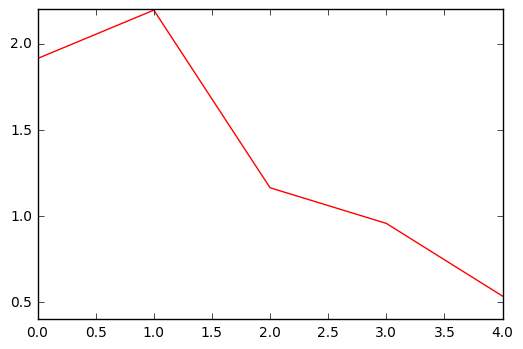

In [96]:
arr= np.random.randn(5)
print arr
plt.plot(arr.cumsum(), 'r-') #r- :빨간색 실선 b:파란색
plt.show()

* hist- 막대그래프

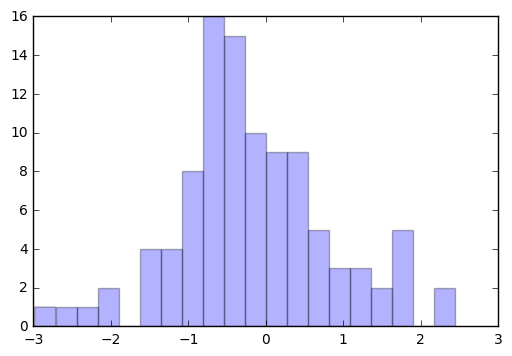

In [366]:
plt.hist(np.random.randn(100),bins = 20,color='b',alpha=0.3)  #bins:구역개수 alpha:투명도
plt.show()

* scatter-선을 그려줌

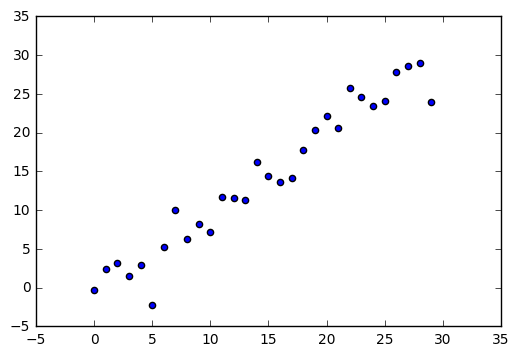

In [370]:
plt.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))  #* np.random.randn(30) -일부러 noise를 줌
plt.show()

* subplot
  - 여러개의 (구역)sub plot으로 구성 가능

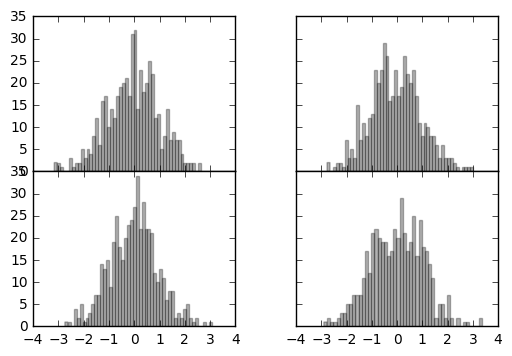

In [415]:
fig, axes = plt.subplots(2,2, sharex= True, sharey= True)  # x와 y를 공유하는가
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color ='k', alpha=0.3)  #k는 black

plt.subplots_adjust(wspace =0.3, hspace =0)  #wspace - 가로 간격 hspace - 세로 간격 

* 선 스타일
 - 색상, 마커, 스타일
 - 색상 
    + 주로 RGB 값을 사용하나, r(빨강), g(초록), b(파랑), k(검정)과 같이 약어를 쓰기도한다.
 - 스타일
    + -  --  -.  :  o  x  ^

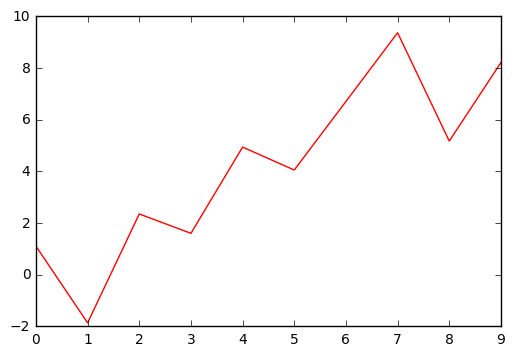

In [416]:
plt.plot(np.arange(10),np.arange(10) +2 * np.random.randn(10),'r-')
plt.show()

* 연습문제 )
 1. 파랑, 녹색을 이용하여 subplot에 -, --, -., : x, o, ^의 조합의 선 그래프를 출력해보세요

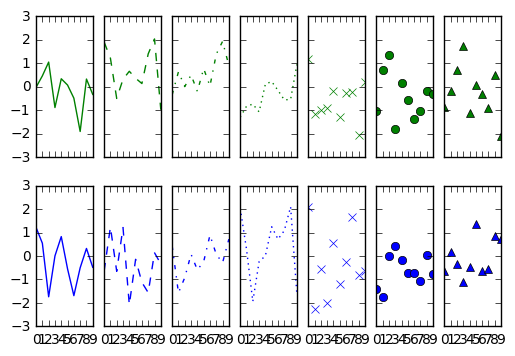

In [424]:
color_list=np.array(['g','b'])
style_list=np.array(['-','--','-.',':','x','o','^'])
style=""

fig, axes = plt.subplots(2,7, sharex= True, sharey= True)  # x와 y를 공유하는가
for i in range(len(color_list)):
    for j in range(len(style_list)):
        style= color_list[i]+ style_list[j]
        axes[i,j].plot(np.random.randn(10),style)  #k는 black


* 제목, 축이름, 눈금, 눈금이름 설정

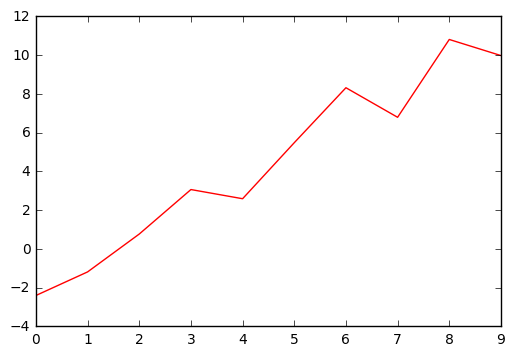

In [425]:
plt.plot(np.arange(10),np.arange(10) +2 * np.random.randn(10),'r-')
plt.show()

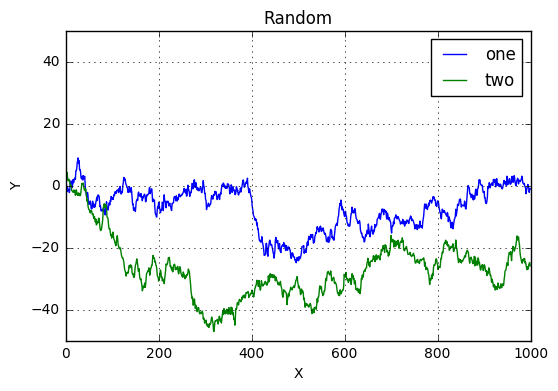

In [101]:
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random')
plt.axis([0,1000,-50,50])  #눈금 설정
plt.grid(True)
plt.plot(np.random.randn(1000).cumsum(),label ='one')
plt.plot(np.random.randn(1000).cumsum(),label ='two')
plt.legend()  #범례
plt.show()

* 연습문제 
 1. 방금 전 구현했던 계단 오르내리는 과정을 그래프로 표현해보세요
   - python version과 numpy 버젼을 범례와 함께 같이 그려보세요

In [452]:
# 순수 파이썬 버젼
import random
pos = 0
walk = [pos]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    pos += step
    walk.append(pos)

print len(walk)

1001


In [454]:
np_steps = 1000
ways = np.random.randint(0, 2, size = np_steps)
np_steps = np.where(ways > 0, 1, -1)
np_walk = np_steps.cumsum()
print len(np_walk)

1000


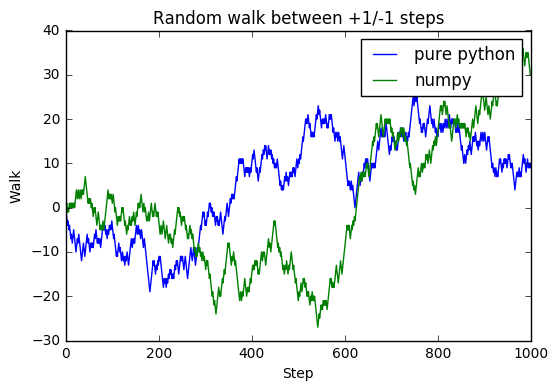

In [451]:
plt.xlabel('Step')
plt.ylabel('Walk')
plt.title('Random walk between +1/-1 steps')
plt.plot(walk, label='pure python')
plt.plot(np_walk, label='numpy')
plt.legend()
plt.show()

In [ ]:
#pyplot tutorial 문서